# Style setup

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
sns.set_theme(context='paper',
             style = 'whitegrid')

from matplotlib import pyplot as plt
import import_ipynb

# Locations setup

In [3]:
imagefolder = '../images/'

# Gather all the data!
## Starting with Hall

In [4]:
import import_ipynb
import hall_data

importing Jupyter notebook from hall_data.ipynb


In [5]:
hall_df = hall_data.get_df()
hall_df.columns

Index(['doping', 'capping', 'anneal', 'filename', 'mu_H', 'Carrier type', 'n',
       'n_sh', 'R_H', 'R_H_sh', 'rho', 'rho_sh', 'V_H', 'd'],
      dtype='object')

## and $\rho_c$

In [6]:
from rho_c_data import full_df as rho_df

importing Jupyter notebook from rho_c_data.ipynb


## and SE

In [7]:
from SE_batch_data import param_df, optics_df

importing Jupyter notebook from SE_batch_data.ipynb


In [8]:
from analysis import df

importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from SESnaps_data.ipynb
===== applying start_pipeline =====
>>> After

===== applying apply_units =====
>>> Before

>>> After
 - n  :  1 / m3
 - omega_t  :  1 / s
 - omega_p  :  1 / s

===== applying compute_optical_mobility =====
>>> After
 - n  :  1 / m3
 - omega_t  :  1 / s
 - omega_p  :  1 / s
 - mu_opt  :  A s2 / kg

===== applying compute_effective_mass =====
>>> After
 - n  :  1 / m3
 - omega_t  :  1 / s
 - omega_p  :  1 / s
 - mu_opt  :  A s2 / kg
 - m_star  :  kg

===== applying compute_Debye_length =====
>>> After
 - n  :  1 / m3
 - omega_t  :  1 / s
 - omega_p  :  1 / s
 - mu_opt  :  A s2 / kg
 - m_star  :  kg
 - L_Debye  :  m

===== applying to_dimensionless =====
>>> After



## Merge Hall and SE, these should behave similarly

In [16]:
from mergeData import HSE
HSE.columns

Index(['MSE', 'roughness', 't_AlOx', 't_AZO', 'AZO_Einf', 'TL_Amp', 'TL_Br',
       'TL_E0', 'TL_Eg', 'omega_p', 'omega_t', 't_SiOx', 't_int',
       'offset_angle', 'doping', 'capping', 'anneal', 'mu_H', 'Carrier type',
       'n', 'n_sh', 'R_H', 'R_H_sh', 'rho', 'rho_sh', 'V_H', 'd_AZO_Hall',
       'rho_corr', 'n_corr', 'R_H_corr'],
      dtype='object')

# Time to make some plots
## Mobility

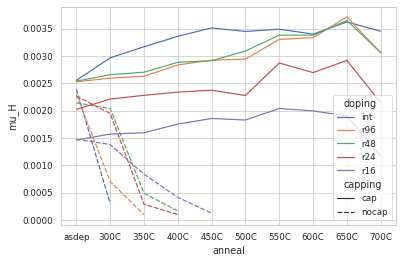

In [23]:
p = sns.lineplot(x = 'anneal',
                y = 'mu_H',
                style = 'capping',
                hue   = 'doping',
                data = df,
                )

#p.set(yscale = 'log')

p.get_figure().savefig(imagefolder + 'mu_H_vs_anneal.png')

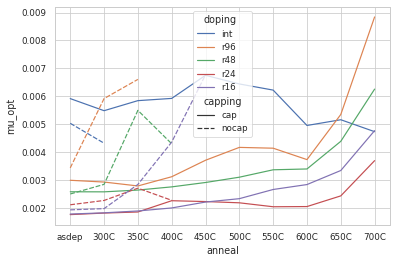

In [10]:
p = sns.lineplot(x = 'anneal',
                y = 'mu_opt',
                style = 'capping',
                hue   = 'doping',
                data = df,
                )

#p.set(yscale = 'log')
plt.show()

p.get_figure().savefig(imagefolder + 'mu_opt_vs_anneal.png')

## Carrier density

In [ ]:
p = sns.lineplot(x = 'anneal',
                y = 'n_sh',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
#p.set(yscale = 'log')
plt.show()
p.get_figure().savefig(imagefolder + 'n_sh_vs_anneal.png')

## Resistivity

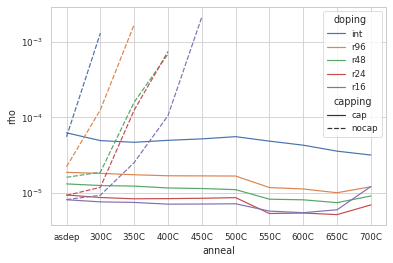

In [24]:
p = sns.lineplot(x = 'anneal',
                y = 'rho',
                style = 'capping',
                hue   = 'doping',
                data = hall_df,
                )
    
p.set(
    yscale = 'log',
)

p.get_figure().savefig(imagefolder + 'rho_sh_vs_anneal.png')
plt.show()

## Looking at trends in data!

In [ ]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping']], hue = 'capping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

In [ ]:
g = sns.PairGrid(df[['n_sh', 'A2', 'B2', 'mu_H','doping', 'capping', 'anneal', 'mu_opt']], hue = 'capping')
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()

In [ ]:
sns.lineplot(x = 'anneal', 
                y = 'mu_opt',
                hue = 'doping',
                data = df[df.capping == 'cap'])

Some clear clusters can be seen when coloring by doping, kind of neat.
Note that A2 (scattering frequency) and n_sh are nicely correlated (parabolic, as expected).

## Contact resistivities
I'll need to figure out how to use both substrate and anneal temperature as categories, should be possible.
For now: only separated by AZO doping.

In [ ]:
p = sns.catplot(x = 'substrate', y = 'rho_c', hue = 'doping', kind = 'bar', data = rho_df)
p.set(yscale = 'log')


# Effects of capping

In [ ]:
g = sns.PairGrid(
    df,
    x_vars = ['anneal'],
    y_vars = ['mu_H'],
    aspect = 3,
    hue  = 'capping',
)
g.map(sns.lineplot)
g.add_legend()

In [ ]:
plot_var_list = ['mu_H', 'n_sh']
fig, ax_list = plt.subplots(
    nrows = len(plot_var_list), 
    sharex = True,
)

for plot_var, ax in zip(plot_var_list, ax_list):
    sns.lineplot(
        x = 'anneal',
        y = plot_var,
        style = 'capping',
        hue   = 'doping',
        data  = df,
        ax    = ax,
    )

In [ ]:
data = (
    df[['doping', 'capping', 'anneal', 'mu_opt', 'mu_H']]
    .melt(id_vars = ['doping', 'capping', 'anneal'],
          value_vars = ['mu_opt', 'mu_H'],
          value_name = 'Mobility',
          var_name = 'Kind',
         )
    .replace({
        'mu_opt': 'Optical',
        'mu_H'  : 'Hall',
        })
    .assign(
        Mobility = lambda df: 1e4*df.Mobility, # to cm^2/Vs
    )
)
p = sns.lineplot(
    x = 'anneal',
    y = 'Mobility',
    hue = 'doping',
    style = 'Kind',
    data = data[data.capping == 'cap'],
)

p.set(
    xlabel = 'Anneal temperature',
    ylabel = 'Mobility $\mu$ cm$^2$/Vs',
)

EXPORT = False 

if EXPORT:
    p.get_figure().savefig(imagefolder + 'mobilities_vs_anneal.png')

In [ ]:
from Da_visu import get_lines

k_impact = get_lines(ks = [0.2, 0.5, 1, 2, 5])

class idDict(dict):
    def __missing__(self, x):
        return x

# possible LaTeX labels go here
names = idDict({
    'k' : '$L/L_t$',
    'sol_type' : 'geometry',
    'x' : 'r',
    'phi' : '$\phi/\\bar{\phi}$',
})

k_impact.sol_type = k_impact.sol_type.map({
    'cyl' : 'cylindrical',
    'planar' : 'Cartesian',
})
#k_impact.k = k_impact.k.astype(str)
print(k_impact.dtypes)


p = sns.lineplot(
    data = (
        k_impact
        .rename(columns = names)
    ),
    x = names['x'],
    y = names['phi'],
    hue = names['k'],
    style = names['sol_type'],
    palette='tab10',
    )


p.set(
    ylim = (0,8),
    xlim = (0,1),
    title = 'Solutions of $\\nabla^2\phi = (L/L_t)^2\phi$ in cylindrical and Cartesian coordinates',
)

plt.show()

EXPORT = True

if EXPORT:
    p.get_figure().savefig(imagefolder + 'phi_solutions.png')

In [ ]:
from Da_visu import get_lines

df = get_lines(ks = np.linspace(0.01, 2, 100), xs = np.array([1]))

class idDict(dict):
    def __missing__(self, x):
        return x

# possible LaTeX labels go here
names = idDict({
    'k' : '$L/L_t$',
    'sol_type' : 'geometry',
    'x' : 'r',
    'phi' : '$\phi/\\bar{\phi}$',

})

df.sol_type = df.sol_type.map({
    'cyl' : 'cylindrical',
    'planar' : 'Cartesian',
})


p = sns.lineplot(
    data = df.rename(columns = names),
    x = names['k'],
    y = names['phi'],
    style = names['sol_type'],
)
p.axhline(0.99, c='k')
p.set(
    xlim = (0, 2),
)
plt.show()

if EXPORT:
    p.get_figure().savefig(imagefolder + 'phi_solutions_edge.png')

In [ ]:
from Da_visu import get_symmetric

ks = [0.2, 0.5, 1, 2, 5]
k_impact = get_symmetric(ks = ks)

class idDict(dict):
    def __missing__(self, x):
        return x

# possible LaTeX labels go here
names = idDict({
    'k' : '$L/L_t$',
    'x' : 'x',
    'phi' : '$\phi/\\bar{\phi}$',
})

p = sns.lineplot(
    data = (
        k_impact
        .rename(columns = names)
    ),
    x = names['x'],
    y = names['phi'],
    hue = names['k'],
    #style = names['sol_type'],
    palette='tab10',
    )


p.set(
    ylim = (0,3),
    xlim = (0,1),
    title = 'Symmetric solutions of $\\nabla^2\phi = (L/L_t)^2\phi$ in Cartesian coordinates',
)

plt.show()

EXPORT = False

if EXPORT:
    p.get_figure().savefig(imagefolder + 'phi_solutions_symmetric.png')

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

from Da_visu import symmetric_fn

def periodic_fn(k = 3):
    fn = symmetric_fn(k = k)
    def wrapped(x):
        return fn(x%1)
    return wrapped
    
x = np.linspace(0, 5, 200)
fig, ax = plt.subplots()
ax.plot(x, periodic_fn()(x))
ax.set_xlim(0, 5)
ax.set_ylim(0, 2)

axins = zoomed_inset_axes(ax, 1, loc=7) # zoom = 6
axins.plot(x, periodic_fn()(x))
x1, x2, y1, y2 = 0, 0.5, 0, 2
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()


importing Jupyter notebook from consistency.ipynb
              name     l    w  area                  comment       R      rho  \
0  pSi_r48_400C_Ag  1.05  1.0  1.05  copper even counterflow  0.0859   90.195   
1  pSi_r48_400C_Ag  1.05  1.0  1.05                      NaN  0.0878   92.190   
2  pSi_r48_400C_Ag  1.05  1.0  1.05                      NaN  0.0904   94.920   
3  pSi_r48_400C_Ag  1.05  1.0  1.05                      NaN  0.0906   95.130   
4  pSi_r48_400C_Ag  1.05  1.0  1.05                      NaN  0.0954  100.170   

  orientation piece  
0        long     A  
1        long     A  
2        long     A  
3        long     A  
4        long     A  


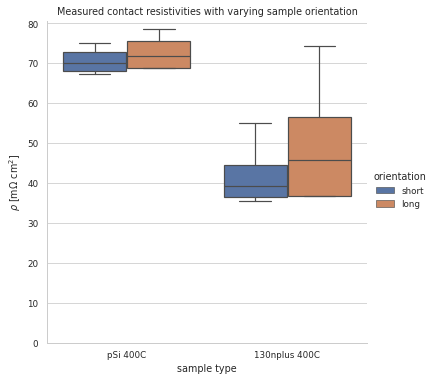

In [3]:
from consistency import df_consistency, filter_multiple_orientations

class idDict(dict):
    def __missing__(self, x):
        return x

# possible LaTeX labels go here
names = idDict({
    'rho' : '$\\rho$ [m$\\Omega$ cm$^2$]',
    'label': 'sample type', 
})

p = sns.catplot(
    data = (df_consistency
            .pipe(filter_multiple_orientations)
            .rename(columns = names)
           ),
    x = names['label'],
    y = names['rho'],
    hue = 'orientation',
    kind = 'box',
)
p.set(
    #yscale = 'log',
    ylim = (0, None),
    title = "Measured contact resistivities with varying sample orientation",
)

#plt.show()
    
EXPORT = False

if EXPORT:
    p.savefig(imagefolder + 'measurement_orientation.png')
    
EXPORT = False

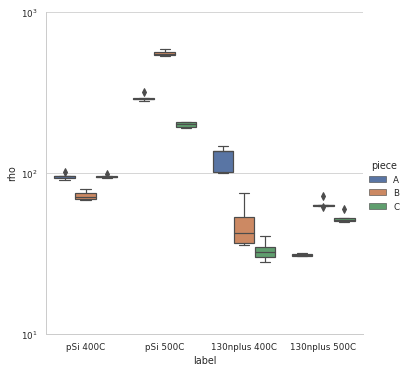

In [10]:

p = sns.catplot(
    x = 'label',
    y = 'rho',
    kind = 'box',
    hue = 'piece',
    data = (df_consistency
            .assign(lbl = lambda df : list(zip(df.label, df.area)))
           )
    
)


p.set(
    yscale = 'log',
    ylim = [10,1000]
    #xlabel = 'samples',
    #xticklabels = [],
)

EXPORT = True

if EXPORT:
    p.savefig(imagefolder + 'measurement_piece.png')
    
EXPORT = False
                    
        

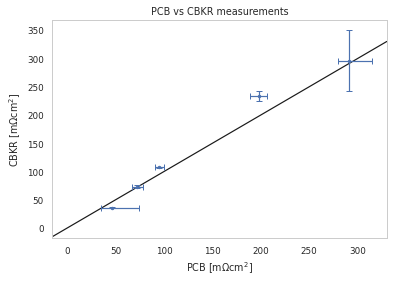

In [12]:
from consistency import PCB_plot, CBKR_plot

if __name__ == "__main__":
    from matplotlib import pyplot as plt

    plt.axline(
        (0,0), 
        slope = 1,
        color = 'k',
    )

    plt.errorbar(
        x =  PCB_plot['mean'], 
        xerr = PCB_plot[['min_err','max_err']].values.T,
        y = CBKR_plot['mean'],
        yerr = CBKR_plot[['min_err','max_err']].values.T,
        fmt = '.',
        capsize = 3,
    )

    plt.grid()

    plt.gca().set(
        xlabel = 'PCB [m$\\Omega$cm$^2$]',
        ylabel = 'CBKR [m$\\Omega$cm$^2$]',
        title = 'PCB vs CBKR measurements',
    )
    
    #plt.yscale('log')
    #plt.xscale('log')
    
    
EXPORT = True

if EXPORT:
    plt.savefig(imagefolder + 'CBKRvsPCB.png')
    
EXPORT = False

<ErrorbarContainer object of 3 artists>

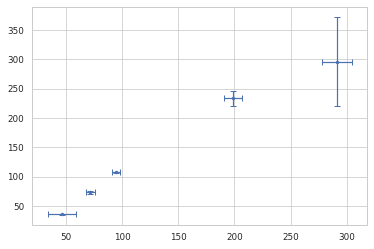

In [17]:
plt.errorbar(
    x =  PCB_plot['mean'], 
    xerr = PCB_plot['std'],
    y = CBKR_plot['mean'],
    yerr = CBKR_plot['std'],
    fmt = '.',
    capsize = 3,
)

In [1]:
from mergeData import HSE

ModuleNotFoundError: No module named 'mergeData'